Méndez Pool Joan de Jesús / 160300102

#  Vigilancia de la Galería de Arte

Supongamos una galería que debe vigilar diferentes obras de arte distribuídas espacialmente dentro de una construcción que puede asumirse como un polígono simple  

La galería busca colocar cámaras (**fijas y con posibilidad de rotación**) para vigilar las obras buscando que:

* **Las cámaras permitan visualizar cada espacio de la galería (no debe haber puntos ciegos)**.
* **La cantidad de cámaras sea mínima**

# <font color="red">Tarea</font>

**Objetivo**: Realizar la coloración de los vértices de un polígono general.

**Instrucciones:**

Para desarrollar este proyecto, deben considerar que el polígono está definido de la siguiente manera: 

1. Las coordenadas de los vértices están registradas en un DataFrame con las columnas *x* e *y*.
2. El polígono contiene un número arbitrario de vértices y se construye uniendo con líneas los vértices sucesivos del DataFrame.
3. El polígono debe leerse por medio de una función llamada $\texttt{GeneraPolígono}$, que no recibe parámetros, pero que les regresa el DataFrame [como la utilizada en esta libreta]. 

Para un **polígono arbitrario** construido con la función $\texttt{GeneraPolígono}$, su implementación debe realizar lo siguiente:

1. Triangular los vértices del polígono mediante el algoritmo de Delaunay.
2. Construir una función que identifique si un triángulo, definido por sus tres vértices se encuentra fuera del polígono original.
3. Eliminar de la triangulación de Delaunay los triángulos ubicados fuera del polígono original.
4. Aplicar la estrategia de coloración de vértices definida en la sección anterior, utilizando tres colores diferentes [ustedes pueden seleccionarlos arbitrariamente]
5. Mostrar, en una gráfica:
    5. El polígono original 
    5. Los vértices coloreados.
    5. Los triángulos internos obtenidos del algoritmo de Delaunay.

## Coloración de los vértices de los triángulos


/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/home/jj/geo/lib/python3.5/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


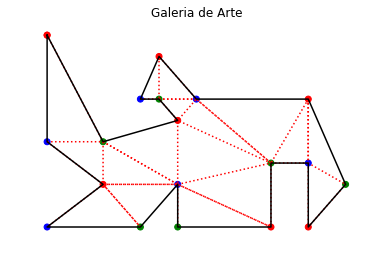

In [3]:
from Triangulacion import GeneraPoligono
# Importar Librerías
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
%matplotlib inline

def calculasegs(df):   
    # Segmentos
    segs = pd.DataFrame(columns=['id', 'x1', 'y1', 'x2', 'y2'])
    # Se determina los segmentos que componen al Poligono
    n = len(df)-1
    for i, ev in df.iterrows():
        if i != n:
            sg = 0 if i==n-1 else i+1
            d = {'id':[i,sg], 'x1':ev['x'], 'y1':ev['y'], 'x2':df.loc[sg]['x'], 'y2':df.loc[sg]['y']}
            segs = segs.append(d, ignore_index=True, sort=False)
    # Definir los datos de los segmentos correctamente para tener sentido en las consultas
    segs["x_inf"] = np.where(segs["y1"]>segs["y2"], segs["x2"], segs["x1"])
    segs["y_inf"] = np.where(segs["y1"]>segs["y2"], segs["y2"], segs["y1"])
    segs["x_sup"] = np.where(segs["y1"]>segs["y2"], segs["x1"], segs["x2"])
    segs["y_sup"] = np.where(segs["y1"]>segs["y2"], segs["y1"], segs["y2"])
    segs["domin"] = np.where(segs["x1"]>segs["x2"], segs["x2"], segs["x1"] ) #Definir Dominio
    segs["domax"] = np.where(segs["x1"]>segs["x2"], segs["x1"], segs["x2"] )
    return segs

def calculacentrogravedad(delatri):
    # Centro de Gravedad
    cnt = pd.DataFrame(columns=['it', 'x', 'y'])
    # Se determina el Centro de Gravedad de cada Triángulo
    for i, sec in enumerate(delatri.simplices):
        tr = pd.DataFrame(columns=['i','x','y'])
        for ev in sec:
            d = {'i':ev, 'x':df.loc[ev]['x'], 'y':df.loc[ev]['y']}
            tr= tr.append(d, ignore_index=True, sort=False)
        # La fórmula usada para realizar el cálculo es obtener el promedio de las coordenadas (x,y) de los 3 puntos
        d = { 'it':int(i), 'x':tr['x'].mean(), 'y':tr['y'].mean() }
        cnt = cnt.append(d, ignore_index=True, sort=False)
    return cnt

def determinatriangulos(delatri, df):
    segs = calculasegs(df)
    cnt = calculacentrogravedad(delatri)
    # Definir Triángulos Interiores
    ls = []
    ctf = pd.DataFrame(columns=['it', 'x', 'y'])
    for i, ev in cnt.iterrows():
        # Delimitamos los segmentos ya sea que tengan el rango mínimo o máximo menor al centroide
        q = '(((y_inf>' + str(ev['y']) + ')|(y_sup>' + str(ev['y']) + '))&'
        # Delimitamos que el centroide se encuentre entre el dominio de los segmentos
        q = q + '((domin<' + str(ev['x']) + ')&(domax>' + str(ev['x']) + ')))'
        # Al delimitar no obtenemos como tal los segmentos inferiores o superiores respecto al centroide
        qr = segs.query(q)
        # Por lo que debemos realizar el cálculo de la pendiente (m) y el punto de intercepción en la ordenada (b)
        qr["m"] = (qr["y_sup"]-qr["y_inf"])/(qr["x_sup"]-qr["x_inf"])
        qr["b"] = qr["y_sup"]-qr["m"]*qr["x_sup"]
        # Realizamos el cálculo de 'y' sobre los segmentos anteriormente definidos con la coordenada 'x' dada
        qr['pi'] = ev['x']*qr['m']+qr['b']
        # Realizamos otra consulta pero esta vez nos quedamos con los puntos de intersección que son superiores
        # a la coordenada 'y' del centroide
        q = 'pi>' + str(ev['y'])
        qr = qr.query(q)
        if not qr.empty:
            if (len(qr) % 2) == 1:
                # Si el número de intersecciones es un número impar, guardamos la información
                ls.append(list(delatri.simplices[i]))
                d = { 'it':int(i), 'x':ev['x'], 'y':ev['y'] }
                ctf = ctf.append(d, ignore_index=True, sort=False)
    return {'tri':ls,'cengra':ctf}

def matrizadyacencia(tri):
    n = len(tri)
    # Creamos una matriz con ceros de tamaño 'n x n'
    ady = np.zeros((n, n), dtype=int)
    # Verificamos todos las adyacencias del grafo
    for i, arr in enumerate(tri):
        j = i + 1
        # Se determina el triángulo actual con todos los siguientes en la lista
        for ar in tri[i+1:]:
            c = 0
            # Se determina si al menos los triangulos a evaluar tienen al menos dos vertices en común
            for k in arr:
                 if k in ar:
                    c+= 1
            # Si se cumple la condición entonces se guarda la adyacencia con el valor 1 en las posiciones actuales
            if c == 2:
                ady[i][j]=1
                ady[j][i]=1
            j+=1
    return ady

def listadyacencia(ls):
    # Se crea un conjunto que contiene como información la lista de adyancecia dado un nodo del grafo
    lsady = set()
    for i, l in enumerate(ls):
        if l == 1:
            lsady.add(i)
    return lsady

def definecolorvertices(trian, ver):
    # Se crea un conjunto con la lista de los colores disponibles [ Modificable ]
    c = set(['r', 'g', 'b'])
    vp = set() # Conjunto vacío que representa los vertices que ya han sido pintados con anterioridad (Vertices Pintados)
    lv = [] # Lista vacía de los vertices por pintar
    # Se determina cada punto del triángulo para verificar si ya ha sido pintado con anterioridad
    for ev in trian:
        # Se realiza la consulta en 'ver', ya que es un DF que contiene la información de coloración de los vertices
        q = 'i==' + str(ev) 
        a = ver.query(q)
        a.reset_index(drop=True, inplace=True)
        if a.empty:
            # Si no se encontró el vertice en el DF se guarda en la lista de los vertices por pintar
            lv.append(ev)
        else:
            # Si se encontró el vertices entonces se guarda el color en el conjunto
            vp.add(a.loc[0]['c'])
    # Se realiza el listado de la diferencia del conjunto de colores respecto a los vertices ya pintados
    # Con está operación siempre obtenemos el color restante
    lc = list(c.difference(vp))
    #lc = list(c - vp)  # Equivalente a la instrucción de la linea anterior
    # Ahora se agregan los vertices por pintar al DF con su respectivo color
    for i, v in enumerate(lv):
        d = {'i':v,'c':str(lc[i])}
        ver = ver.append(d, ignore_index=True, sort=False)
    # Dado la simplificación del algoritmo y la utilidad del grafo, la primera vez que se ejecuta esta rutina
    # se guardan los tres vertices, pero apartir de la siguiente vez que se use debido a la adyancecia
    # solo se agrega color al vertice faltante
    return ver

def DFS(graph, tri, start):
    # Aplicación del Algoritmo 'Búsqueda en Profundidad' o 'Deep First Search' 
    ver = pd.DataFrame(columns=['i', 'c'])
    stack = [start]
    visited = set()
    while stack:
        vertex = stack.pop()
        if not vertex in visited:
            visited.add(vertex)
            stack.extend((listadyacencia(graph[vertex])).difference(visited))
            #stack.extend(listadyacencia(graph[vertex]) - visited) # Equivalente a la instrucción de la linea anterior
            # Modificación en el DFS para obtener un DF que contiene la coloración de los vertices
            ver = definecolorvertices(tri[vertex], ver)
    ver = ver.sort_values(by=["i"], ascending=True)
    ver.reset_index(drop=True, inplace=True)
    d = {'i':len(ver), 'c':ver.loc[0]['c']}
    ver = ver.append(d, ignore_index=True, sort=False)
    return ver

def coloreavertices(df):
    # Copia de DF de vertices
    cam = df.copy(deep=True)
    #triangulación de los puntos del polígono
    delatri = Delaunay(df.values) #algoritmo de triangulación de Delaunay
    # Determina triangulos internos
    trian = determinatriangulos(delatri, df)
    # Crea Grafo (Matriz de Adyacencia)
    ady = matrizadyacencia(trian['tri'])
    # Recorrido de Grafo y asignación de colores a vertices
    col = DFS(ady, trian['tri'], 0)
    # Asignación de colores al DF de vertices
    cam['c'] = col['c']
    return {'cam':cam, 'tri':{'trian':trian['tri'], 'cengra':trian['cengra']} }

def dibujapoligono(df, trian, show=True):
    #Dibuja cada uno de los triángulos
    plt.title("Galeria de Arte")
    plt.axis("off")
    for t in trian['trian']:
        #la rutina triangula los puntos del polígono, formando un polígono convexo, 
        plt.plot([df.iloc[t[0]]["x"],df.iloc[t[1]]["x"],df.iloc[t[2]]["x"]], 
                 [df.iloc[t[0]]["y"],df.iloc[t[1]]["y"],df.iloc[t[2]]["y"]], "r:")
    # Dibuja los puntos con su respectivo color
    plt.scatter(df["x"], df["y"], c=df['c'])
    # [ Opcional ] Dibuja los centroides de cada triángulo
    #plt.scatter(trian['cengra']['x'], trian['cengra']['y'], marker='X', c='k')
    plt.plot(df["x"], df["y"], c='k')
    if show:
        plt.show()

df = GeneraPoligono()
vertices = coloreavertices(df)
dibujapoligono(vertices['cam'], vertices['tri'])

## Conclusión

La realización de este trabajo mezcla los conceptos vistos en el parcial pasado, en especial sobre el manejo de segmentos de recta, no fue una tarea tediosa como lo fue el famoso 'Barrido de Linea Ordenado por la Abscisa', ya que manejando las estructuras de datos correcta se puede resolver de forma sencilla la problemática sin tener que recurrir a algoritmos brutos sacados de la manga, de igual forma vemos la importancia de la figura geométrica conocida como triángulo, es una figura de vital importancia en la Geometría ya que se pueden crear triángulos a partir de Polígonos siendo una pieza clave en la solución del problema el Algoritmo de Triangulación de Delaunay. Se pudo lograr la implementación de la coloración de vertices gracias a los algoritmos adecuados entre ellos el DFS para la composición de una solución que pueda resolver dicho problema en la mayor cantidad de Polígonos posibles.